<a href="https://www.kaggle.com/code/willnguyen1204/credit-card-fraud-analysis-and-prediction?scriptVersionId=179632450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.color_palette("pastel")
sns.set_palette("pastel")
#sns.set_style("whitegrid")

# **Load dataset**

In [1]:
df = pd.read_csv("/kaggle/input/credit-card-fraud-prediction/fraud test.csv", sep=",")

In [2]:
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
426772,426772,03/12/2020 12:48,3.573030e+15,fraud_Abshire PLC,entertainment,44.45,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,ea0d6c3023cee93a0f295c267f66b651,1386074887,39.510471,-111.349840,0
197841,197841,30/08/2020 05:32,4.500000e+12,fraud_Denesik and Sons,shopping_pos,13.36,Joseph,Nixon,M,86882 Desiree Camp Suite 047,...,38.2833,-75.8465,470,Music tutor,07/04/1965,636b5c4252c727f00437fc35c3525bbf,1377840755,38.822567,-75.112875,0
345789,345789,01/11/2020 20:23,1.800400e+14,fraud_Cartwright PLC,kids_pets,44.84,Mary,Schmidt,F,022 Moore Island,...,40.7699,-73.9511,1577385,Audiological scientist,29/12/1957,a540901b1a0379ab1777883ff0af4415,1383337426,41.610599,-74.432944,0
523340,523340,24/12/2020 19:54,4.128730e+18,"fraud_Pouros, Walker and Spencer",kids_pets,201.57,Monique,Martin,F,68276 Matthew Springs,...,31.3833,-95.0619,43,"Engineer, production",04/10/1949,7d56aa66c1a976a0d5891422aa01f641,1387914888,31.948194,-95.499481,0
554664,554664,31/12/2020 17:51,3.858850e+13,fraud_Gottlieb Group,kids_pets,131.94,Jacqueline,Curry,F,3047 Jeff Place,...,30.1886,-103.2214,498,Lexicographer,23/11/1990,7a63eab9a49a44b4210f56db081a428a,1388512263,29.520209,-103.004298,0


# **Overview of dataset**

In [3]:
df.shape

(555719, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [6]:
df['job'].value_counts()

job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

In [7]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64

In [8]:
df.nunique()

Unnamed: 0               555719
trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

# **Data Cleaning**

In [9]:
# Check for duplicate
print(len(df[df.duplicated()]))

0


In [10]:
# Check for null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# rename the column
df.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [12]:
df['merchant'] = df['merchant'].str.replace("fraud_", "")

In [13]:
# Split trans_date_trans_time
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand=True)
df.head(5)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,21/06/2020 12:14,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,21/06/2020,12:14
1,1,21/06/2020 12:14,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,21/06/2020,12:14
2,2,21/06/2020 12:14,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,21/06/2020,12:14
3,3,21/06/2020 12:15,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,21/06/2020,12:15
4,4,21/06/2020 12:15,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,21/06/2020,12:15


In [14]:
# Conver to date 
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_time'] = pd.to_datetime(df['trans_time'], format= '%H:%M').dt.time
df['trans_time_group'] = df['trans_date_trans_time'].dt.hour
df['trans_month'] = df['trans_date'].dt.to_period('M').astype("str")
df['trans_dayOfWeek'] = df['trans_date'].dt.day_name()


In [15]:
#calculate age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (2020  - df['dob'].dt.year)

In [16]:
df['age'].unique()

array([52, 30, 50, 33, 65, 29, 69, 48, 47, 64, 24, 44, 43, 83, 49, 32, 28,
       23, 35, 63, 72, 90, 46, 56, 62, 25, 40, 51, 45, 59, 77, 41, 34, 26,
       91, 86, 27, 21, 38, 22, 36, 42, 31, 53, 20, 71, 82, 54, 55, 75, 37,
       16, 68, 39, 70, 17, 66, 60, 79, 58, 74, 67, 96, 57, 19, 61, 94, 73,
       84, 85, 81, 78, 15, 76, 89, 93, 80, 92, 87, 88, 18], dtype=int32)

In [17]:
print("Min age", df['age'].min())
print("Max age", df['age'].max())

Min age 15
Max age 96


In [18]:
def apply_age_group(age):
    if(age <= 18):
        return 'Teenager'
    elif (age <= 25):
        return "Young Adult"
    elif (age <= 64):
        return "Adult"
    else:
        return "Elder"

In [19]:
df['age_group'] = df['age'].apply(apply_age_group)

In [20]:
df['is_not_fraud']= df['is_fraud'].apply(lambda x: 1 if x == 0 else 0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  float64       
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [22]:
# Drop unnecessary columns
df = df.drop(['street', 'zip', 'city_pop', 'trans_num', 'unix_time', 'merch_lat', 'merch_long','first','last','dob','lat','long'], axis=1)

In [23]:
df.sample(5)

,id,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,is_fraud,trans_date,trans_time,trans_time_group,trans_month,trans_dayOfWeek,age,age_group,is_not_fraud
149720,149720,2020-08-12 03:12:00,3.002680e+13,Zemlak Group,misc_net,117.10,M,Mayersville,MS,Technical brewer,0,2020-08-12,03:12:00,3,2020-08,Wednesday,41,Adult,1
101499,101499,2020-07-26 21:45:00,3.520550e+15,"Streich, Dietrich and Barton",shopping_net,11.35,M,Hovland,MN,Freight forwarder,0,2020-07-26,21:45:00,21,2020-07,Sunday,19,Young Adult,1
29112,29112,2020-06-30 19:13:00,3.582750e+15,Heaney-Marquardt,entertainment,6.72,M,Norman,AR,Magazine features editor,0,2020-06-30,19:13:00,19,2020-06,Tuesday,54,Adult,1
443166,443166,2020-12-07 07:53:00,3.482540e+14,"Stroman, Hudson and Erdman",gas_transport,69.92,M,Grand Bay,AL,Armed forces logistics/support/administrative ...,0,2020-12-07,07:53:00,7,2020-12,Monday,72,Elder,1
275144,275144,2020-10-01 15:02:00,3.423510e+14,"Schoen, Nienow and Bauch",personal_care,252.03,F,Juliette,GA,Theatre manager,0,2020-10-01,15:02:00,15,2020-10,Thursday,30,Adult,1


# **Analysis**

In [24]:
def annotate_bar(ax, custom_y_func, font_size = 14):
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(), 1))
        x = (p.get_x() + p.get_width() / 2) * 0.99
        y = ((p.get_y() + p.get_height() / 2) * 0.99)
        
        y = custom_y_func(y)
        ax.annotate(
            value,
            (x,y),
            color="black",
            size= font_size, ha='center', va='center'
        )

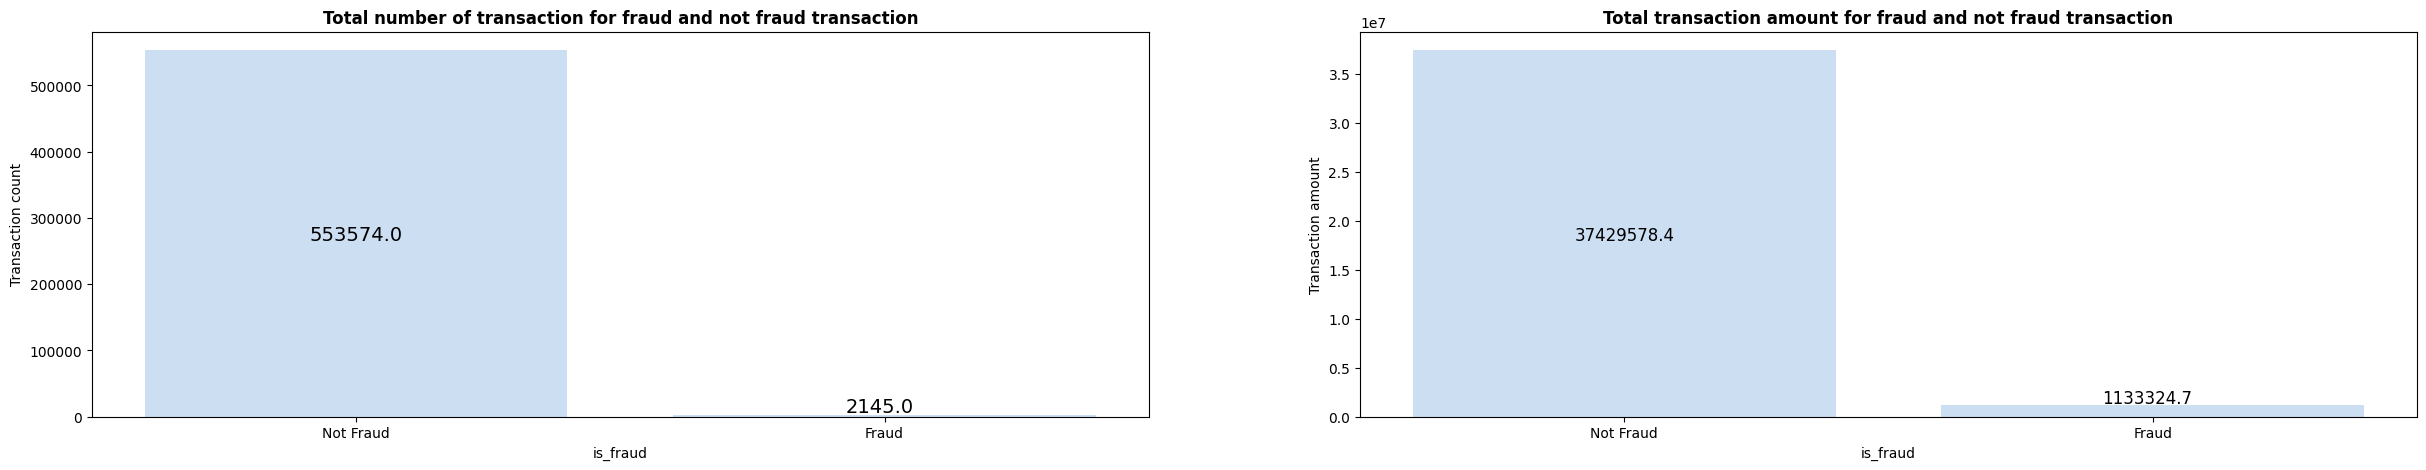

In [25]:
fig = plt.figure(figsize=(30, 5))

plt.subplot(1,2,1)
df_fraud_count = df['is_fraud'].apply(lambda x: "Fraud" if x == 1 else 'Not Fraud').value_counts().reset_index()
ax = sns.barplot(data = df_fraud_count, x = 'is_fraud', y='count', color='#c6def8')
#ax = df_fraud_count.plot(kind="bar", figsize=(15,5), title='Number of fraud and not fraud transaction')

# because no of fraud case to too small we set y to a fixed value to display in the chart 
annotate_bar(ax, lambda y: 15000 if y < 10000 else y, font_size = 14,)
plt.title('Total number of transaction for fraud and not fraud transaction',fontsize=12,fontweight='bold')
plt.ylabel("Transaction count")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

df_fraud_amount = df.groupby('is_fraud')['amt'].sum().reset_index()

plt.subplot(1,2,2)
ax = sns.barplot(data = df_fraud_amount, x = 'is_fraud', y='amt', color='#c6def8')
annotate_bar(ax, lambda y: 1900000 if y < 1200000 else y, font_size = 12)

plt.title('Total transaction amount for fraud and not fraud transaction',fontsize=12,fontweight='bold')
plt.ylabel("Transaction amount")
ax.set_xticklabels(['Not Fraud','Fraud'], rotation = 0)
plt.show()

There's a total of 555719 transactions. In those transactions, there are 553574 valid transaction which make up 99.61%. The remaining 0.39% is the fraud cases.

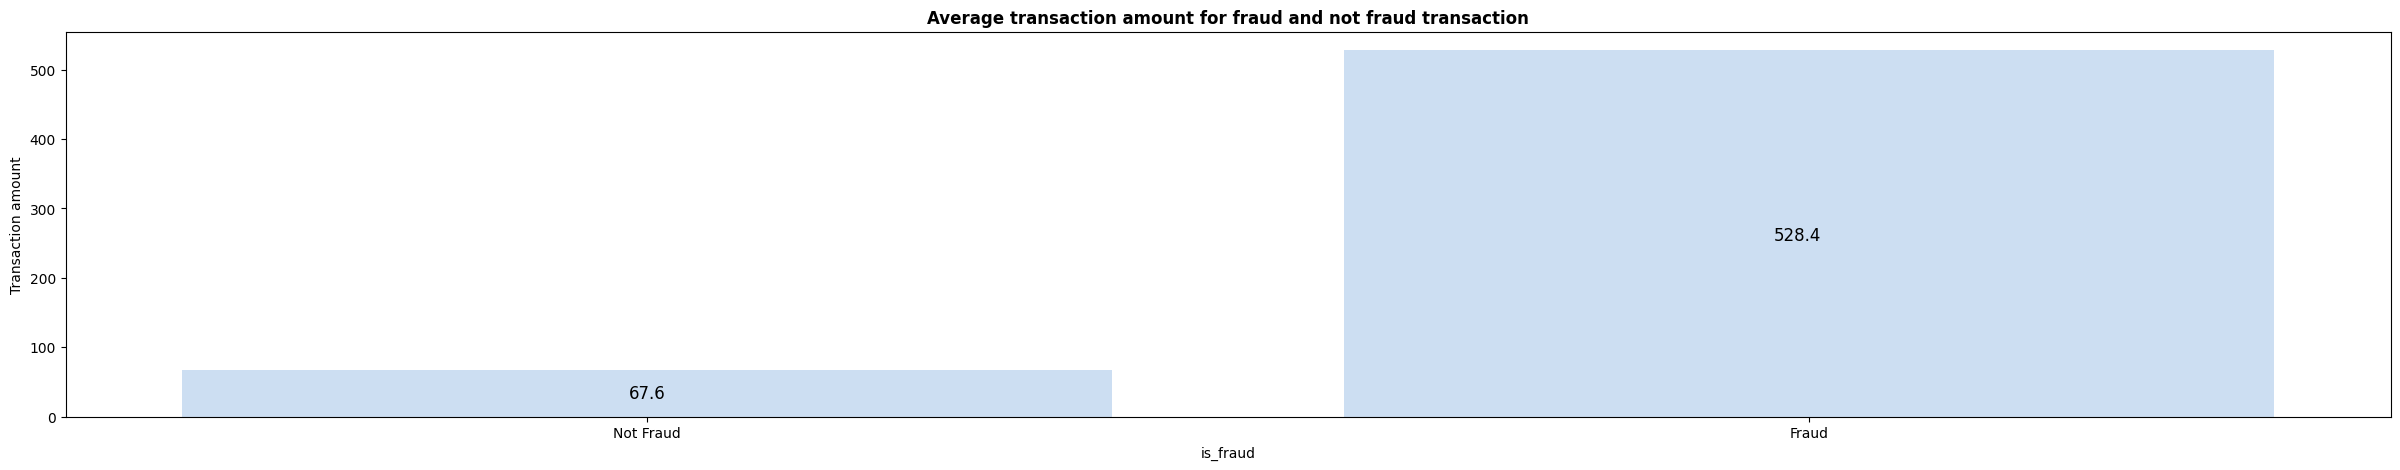

In [26]:
# Calculate the average transaction amount for fraudulent and non-fraudulent transactions
fig = plt.figure(figsize=(30, 5))
avg_amt = df.groupby('is_fraud')['amt'].mean().reset_index()
ax = sns.barplot(data = avg_amt, x = 'is_fraud', y='amt', color='#c6def8')
annotate_bar(ax, lambda y: y, font_size = 12)
plt.title('Average transaction amount for fraud and not fraud transaction',fontsize=12,fontweight='bold')
plt.ylabel("Transaction amount")
ax.set_xticklabels(['Not Fraud','Fraud'], rotation = 0)
plt.show()

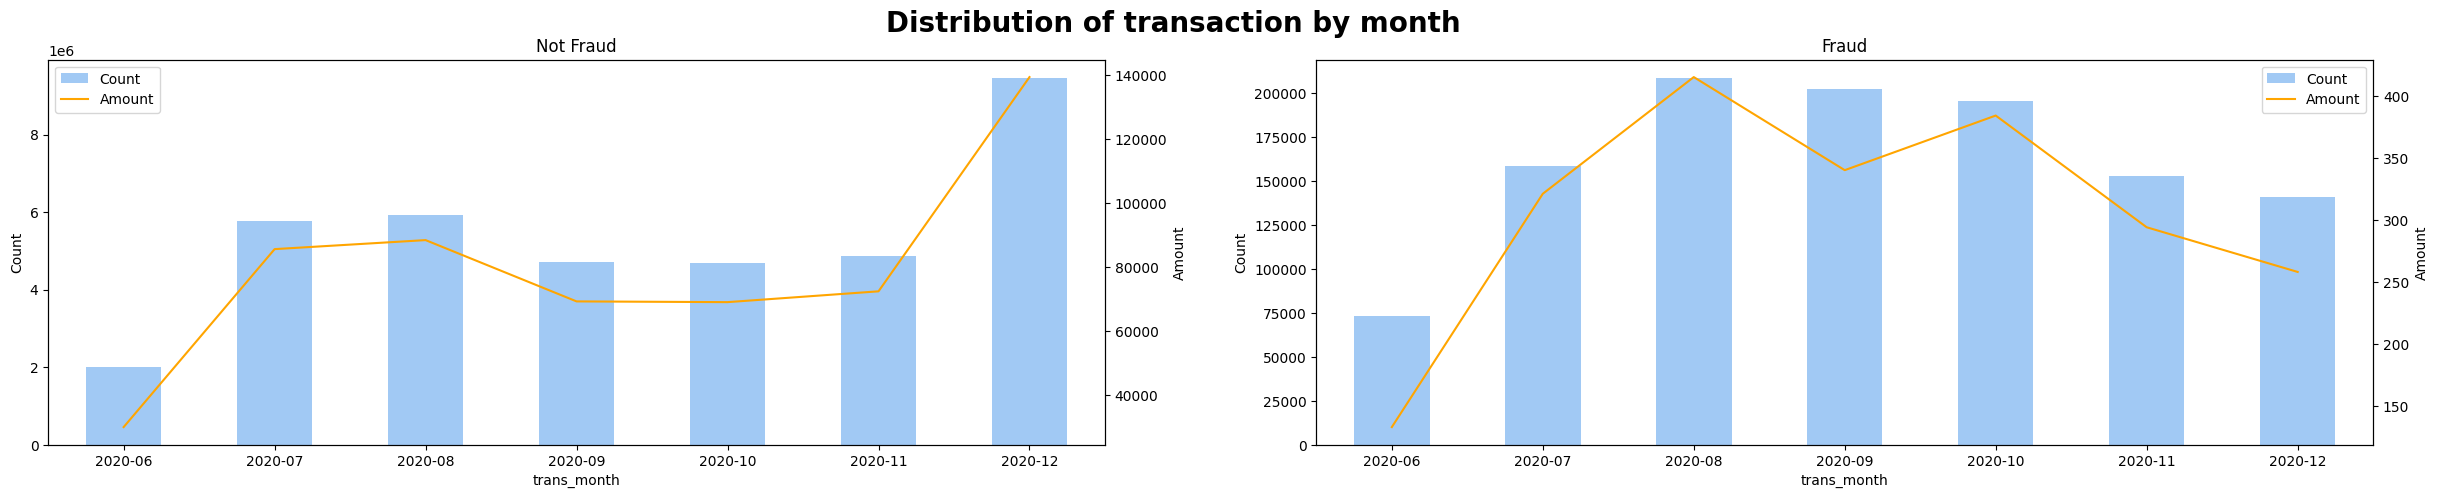

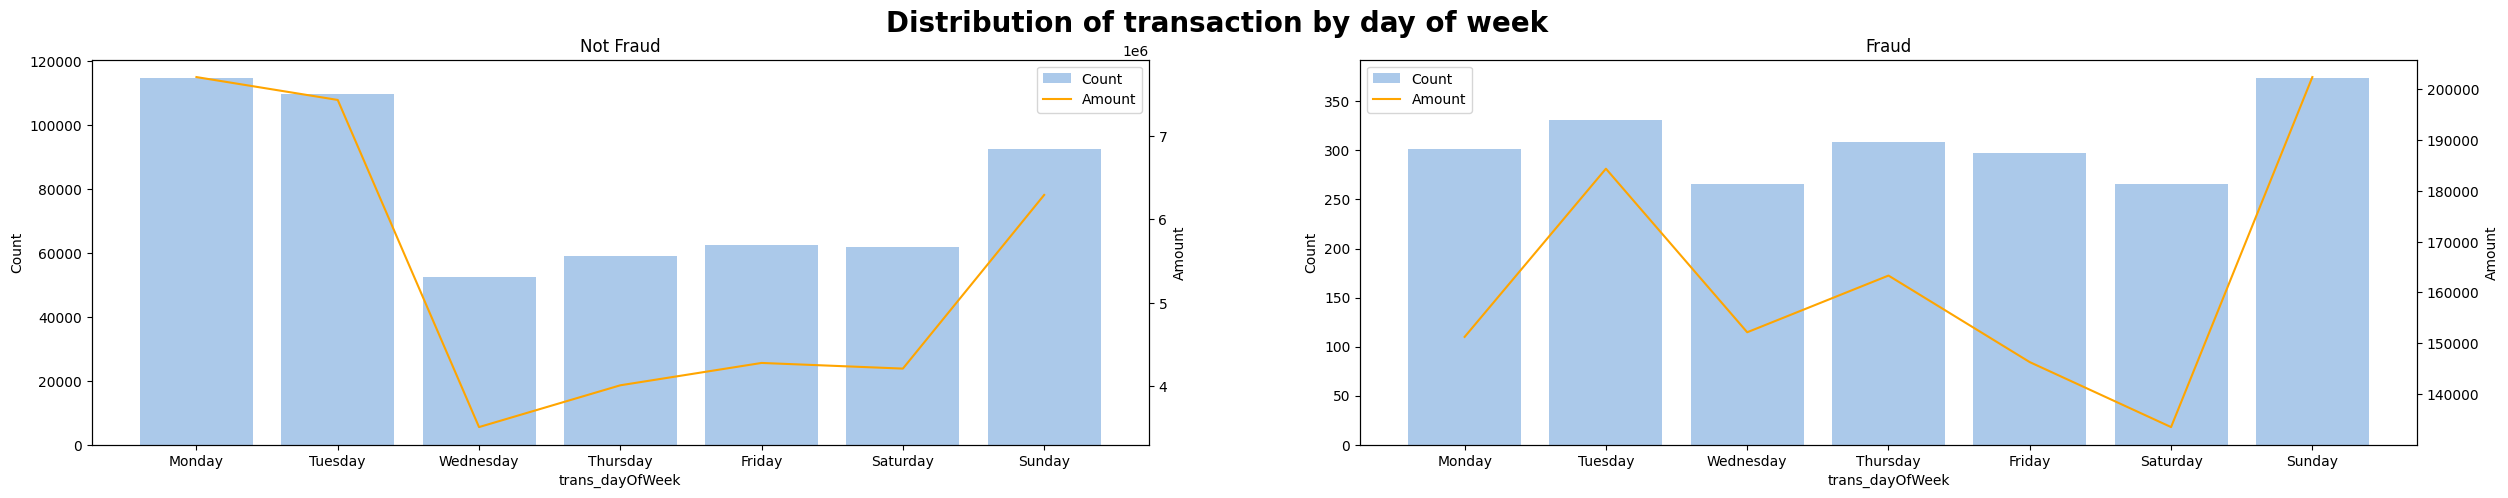

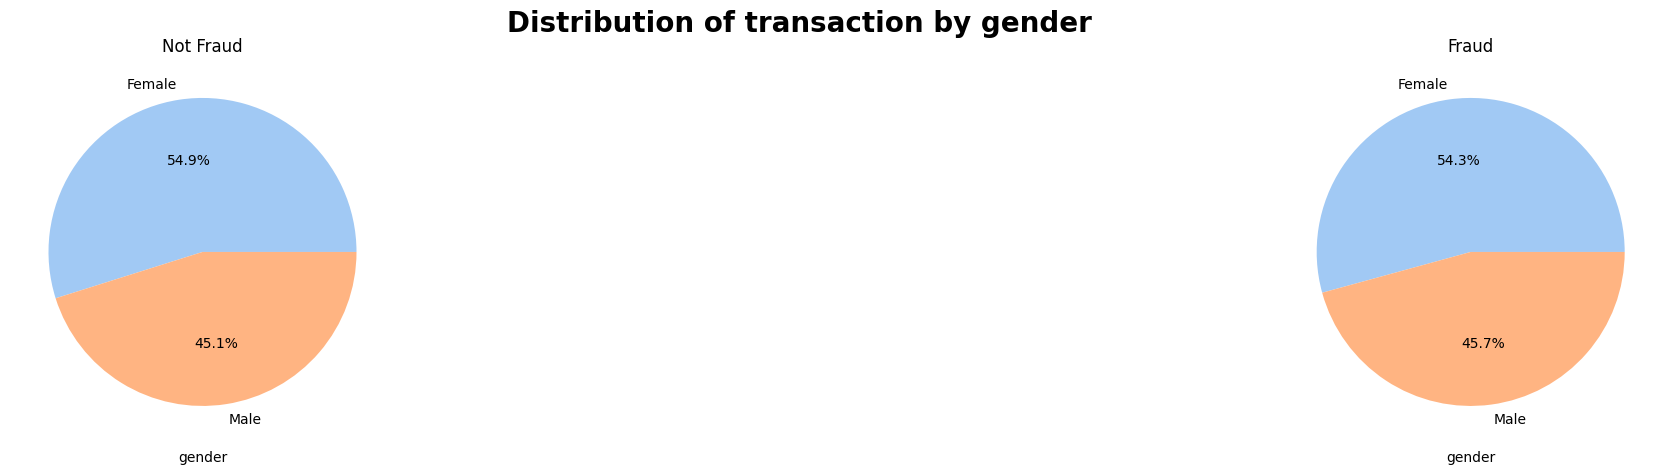

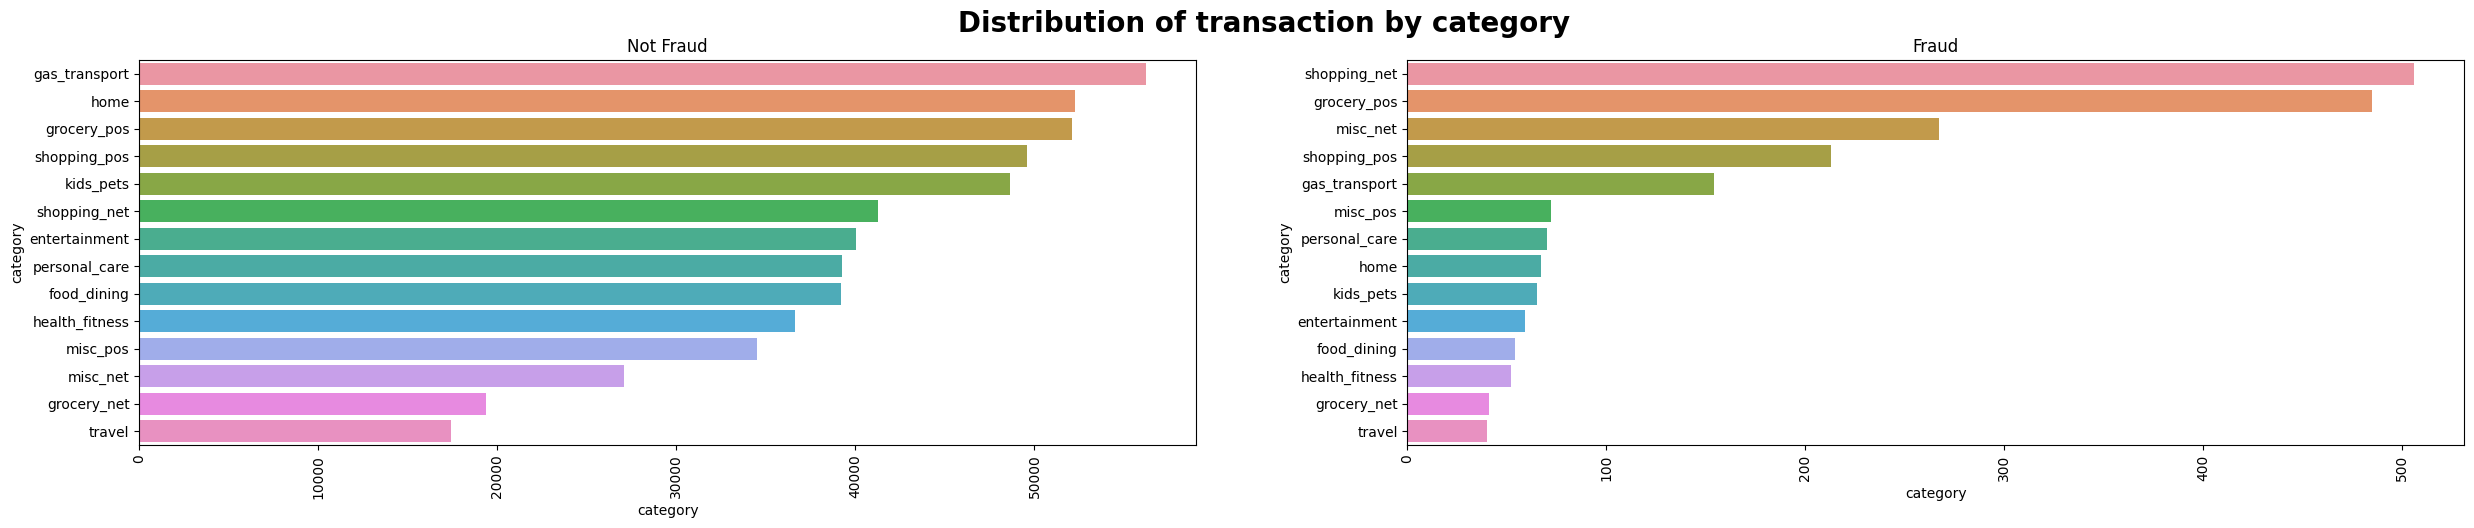

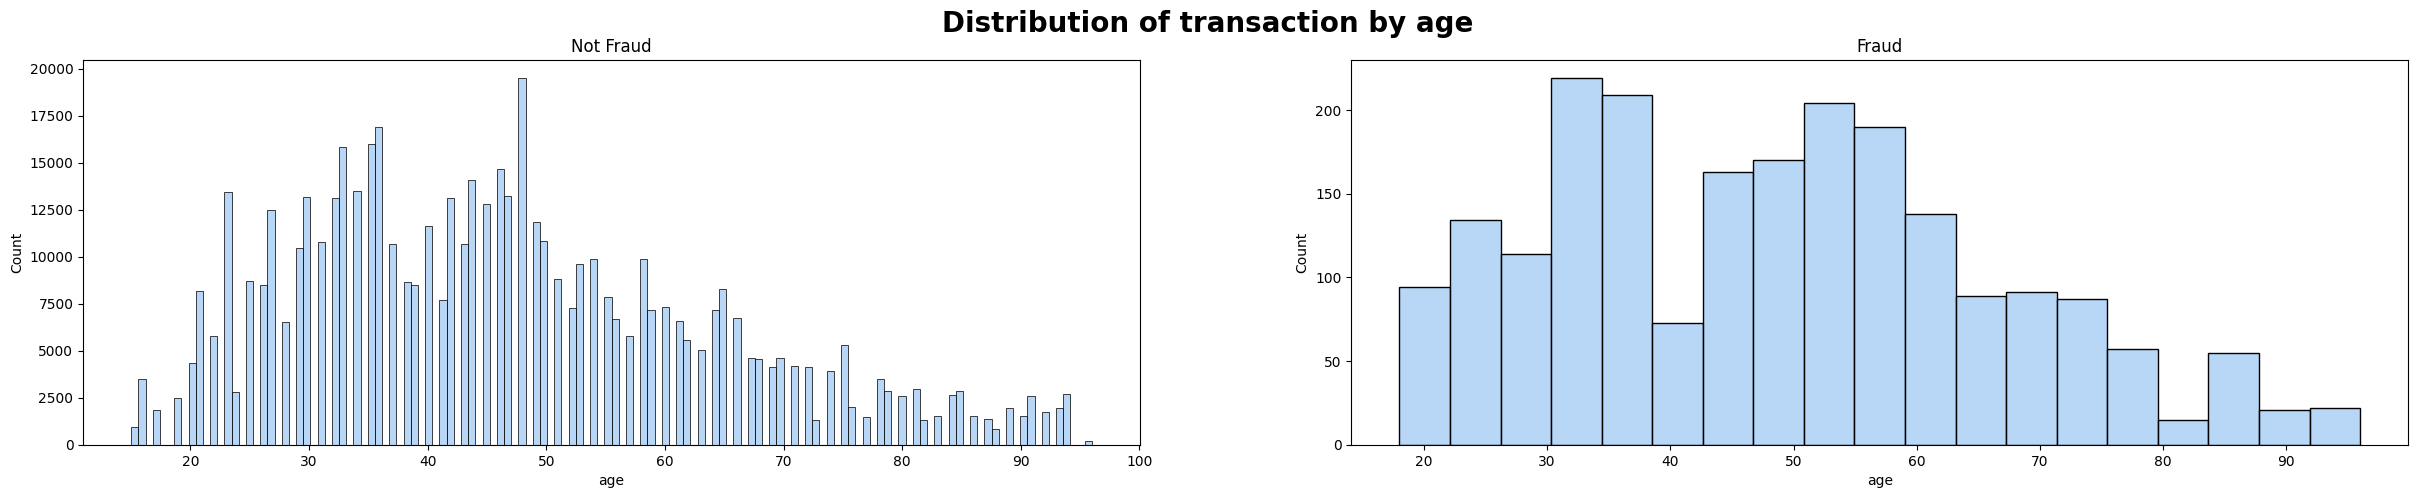

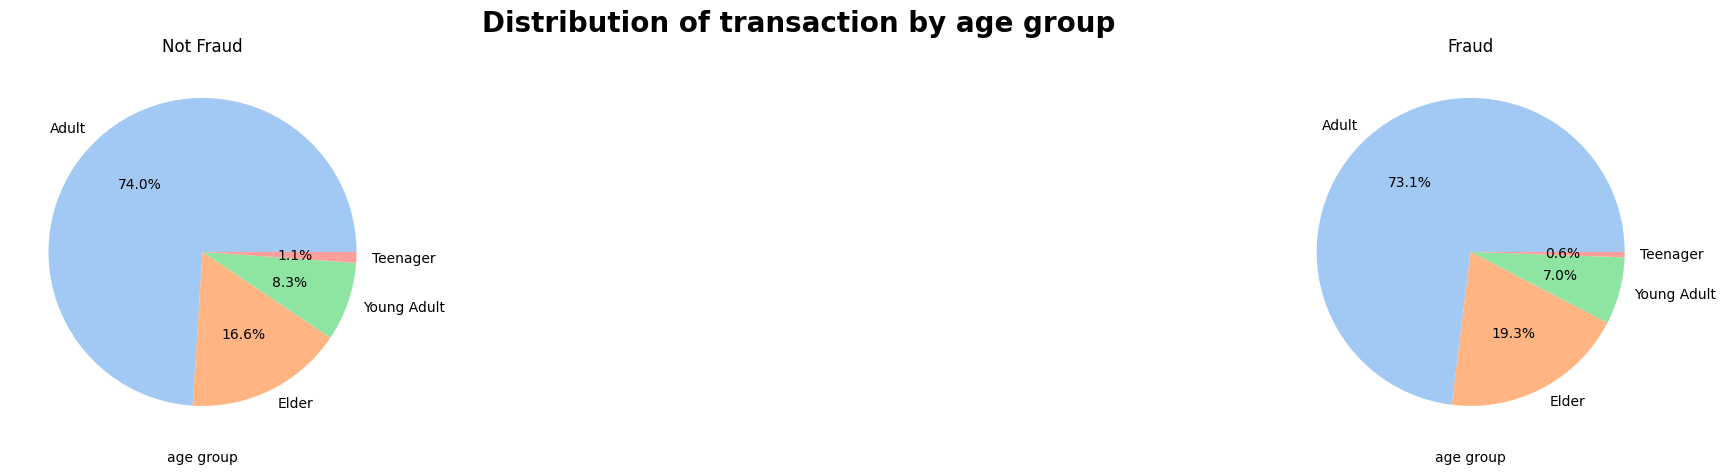

In [27]:
#ploting the overview of dataset by month, gender and category
columns = ['trans_month','trans_dayOfWeek','gender','category','age','age_group']
columns_name = ['month','day of week','gender','category','age','age group']
name = ['Not Fraud','Fraud']

df['fraud'] = df['is_fraud'].apply(lambda x: "Fraud" if x == 1 else 'Not Fraud')

index = 0
for col in columns:
    fig = plt.figure(figsize=(30, 5))
    plt.suptitle("Distribution of transaction by " + columns_name[index],fontsize=20,fontweight='bold')
    
    for i in range(0,2):
        plt.subplot(1,2,1+i)
        df_1 = df[df['is_fraud'] == i]
        if (col == 'trans_month'):
            ax = df_1.groupby(col)['amt'].sum().plot(kind='bar',label='Count')
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
            ax.set_ylabel('Count')
            
            plt.twinx()
            ax1 = df_1.groupby(col).size().plot(kind='line',color='orange', label='Amount')
            ax1.set_xticklabels(ax.get_xticklabels(), rotation = 0)
            ax1.set_ylabel('Amount')   
            
            chart, labels = ax.get_legend_handles_labels()
            chart1, labels1 = ax1.get_legend_handles_labels()
            ax1.legend(chart + chart1, labels + labels1, loc=0)
        elif (col == 'gender'):
            ax = plt.pie(df_1[col].value_counts(), labels = ['Female','Male'] , autopct='%1.1f%%')
        elif (col == 'age_group'):
            ax = plt.pie(df_1[col].value_counts(), labels = df_1[col].value_counts().index , autopct='%1.1f%%')
        elif (col == 'trans_dayOfWeek'):
            cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            ax = sns.barplot(data = df_1.groupby(col).size().reset_index(), x = col, y=0, label = 'Count'
                            , color='#a1c9f4', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
            ax.set_ylabel('Count')
            
            plt.twinx()
            
            ax1 = sns.lineplot(data = df_1.groupby(col)['amt'].sum().reindex(cats).reset_index(), x = col, y='amt', label ='Amount'
                            , color='orange')
            ax1.set_ylabel('Amount')
            
            chart, labels = ax.get_legend_handles_labels()
            chart1, labels1 = ax1.get_legend_handles_labels()
            ax1.legend(chart + chart1, labels + labels1, loc=0)
        elif (col == 'category'):
            ax = sns.countplot(data=df_1, y=col, order = df_1[col].value_counts().index)
        else:
            ax = sns.histplot(data=df_1, x=col)
        plt.title(name[i])
        plt.xlabel(columns_name[index])
    
        if col == 'category':
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    index +=1
    plt.show()

**By months**
* For 'Not Fraud' cases, 06/2020 is the month with the lowest number of transactions. In the following months, the number of transactions increased and remained stable,reaching the highest level in December. 
    * For 12/2020, the different is significant when comparing to previous month. That is quite understandable because December has an important holiday, Christmas. Moreover, consumer demand also often increases  at the end of the year,.
* For Fraud case, July is still the lowest month then steadily increases as time goes by, reaching its peak in August. After reaching its peak, number of fraud transaction graudually over the following months.
    * From Aug to Oct, we have high number of fraud transactions. 
    
**Day of week**
* The 2 charts share a similar pattern that Sunday, Monday, Tuesday have the most number of transaction for both fraud and not fraud. This indicates we should pay more attentions to transactions happen on these at as they are more likely to be fraud.

**By gender**
* Based on the observation, in both types of transactions female have more transaction when compare to male. Though, the gap is not that significant.

**By category**
* For 'Not Fraud' cases, the top 3 categories are gas_transport, grocery_pos, home, with gas_transport is the highest
* For 'Fraud' cases, the top 3 categories are grocery_pos, shopping_net, and misc_net
* grocery_pos is an category we should keep an eyes on

**By age**
* For both Fraud and Not Fraud, the distribution is quite similar with Adult (26-65) have the most transaction, while Teenager have the least.
* This is quite predictable as teenager don't have a stable income yet and mainly depend on family support
* Adult is still in prime working age


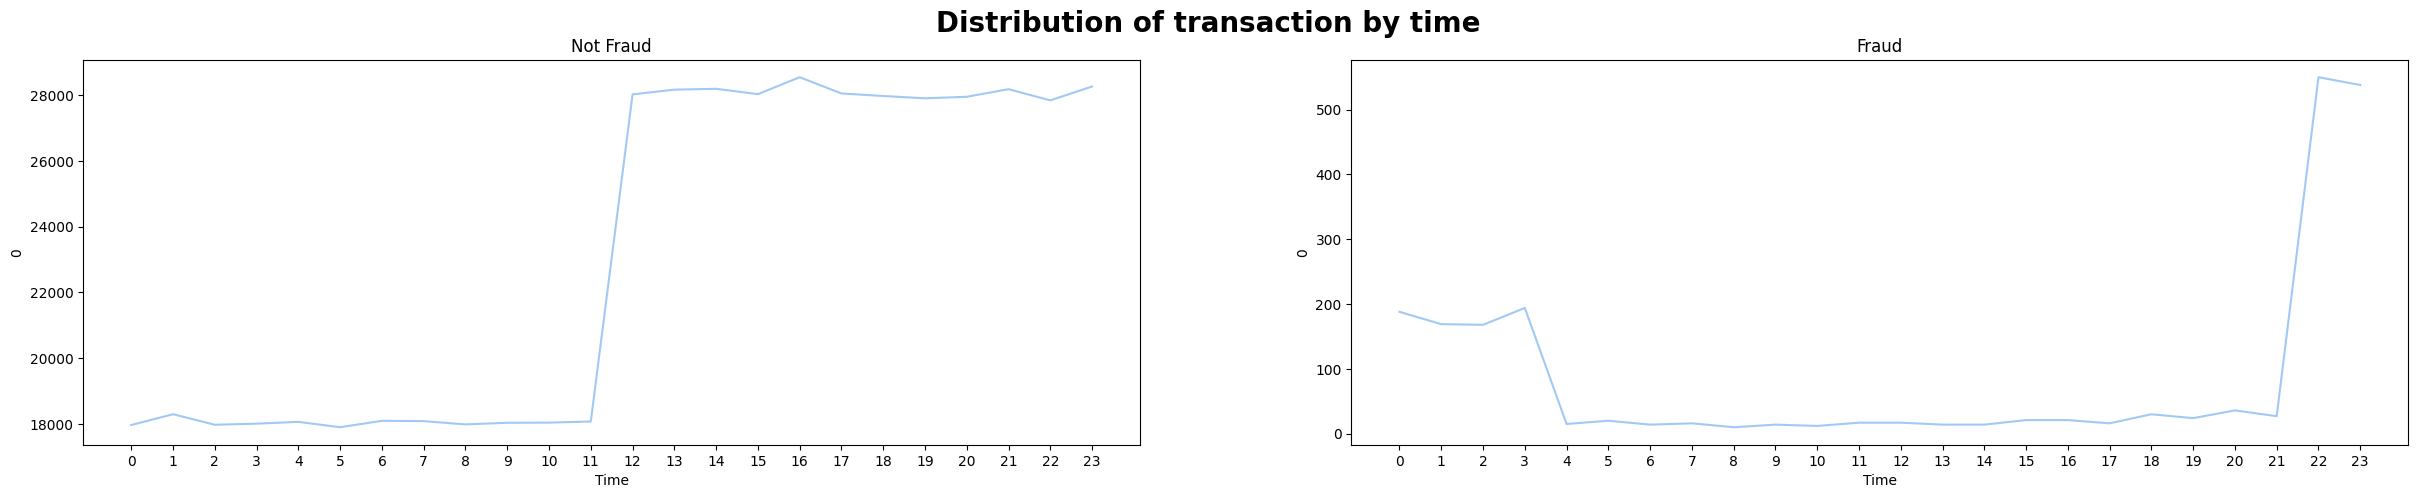

In [28]:
name = ['Not Fraud','Fraud']

fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by time",fontsize=20,fontweight='bold')
for i in range(0,2):
    plt.subplot(1,2,1+i)
    temp = df[df['is_fraud'] == i].groupby('trans_time_group').size().reset_index().sort_values(by='trans_time_group')
    ax = sns.lineplot(data=temp, x="trans_time_group", y=0)
    plt.title(name[i])
    plt.xlabel('Time')
    ax.set(xticks=df['trans_time_group'].unique())
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()
    

From 0h-11h, number of transaction maintain at a stable rate \
From 11h - 24 is the period where people actively make transaction, hence the significant jump compare to pevious period. \
For fraud transaction, majority of the cases happen at late at night (22-24h) or early time of the date (0-4h), which implies people with bad intention will more likely to act at a time with low human monitoring.

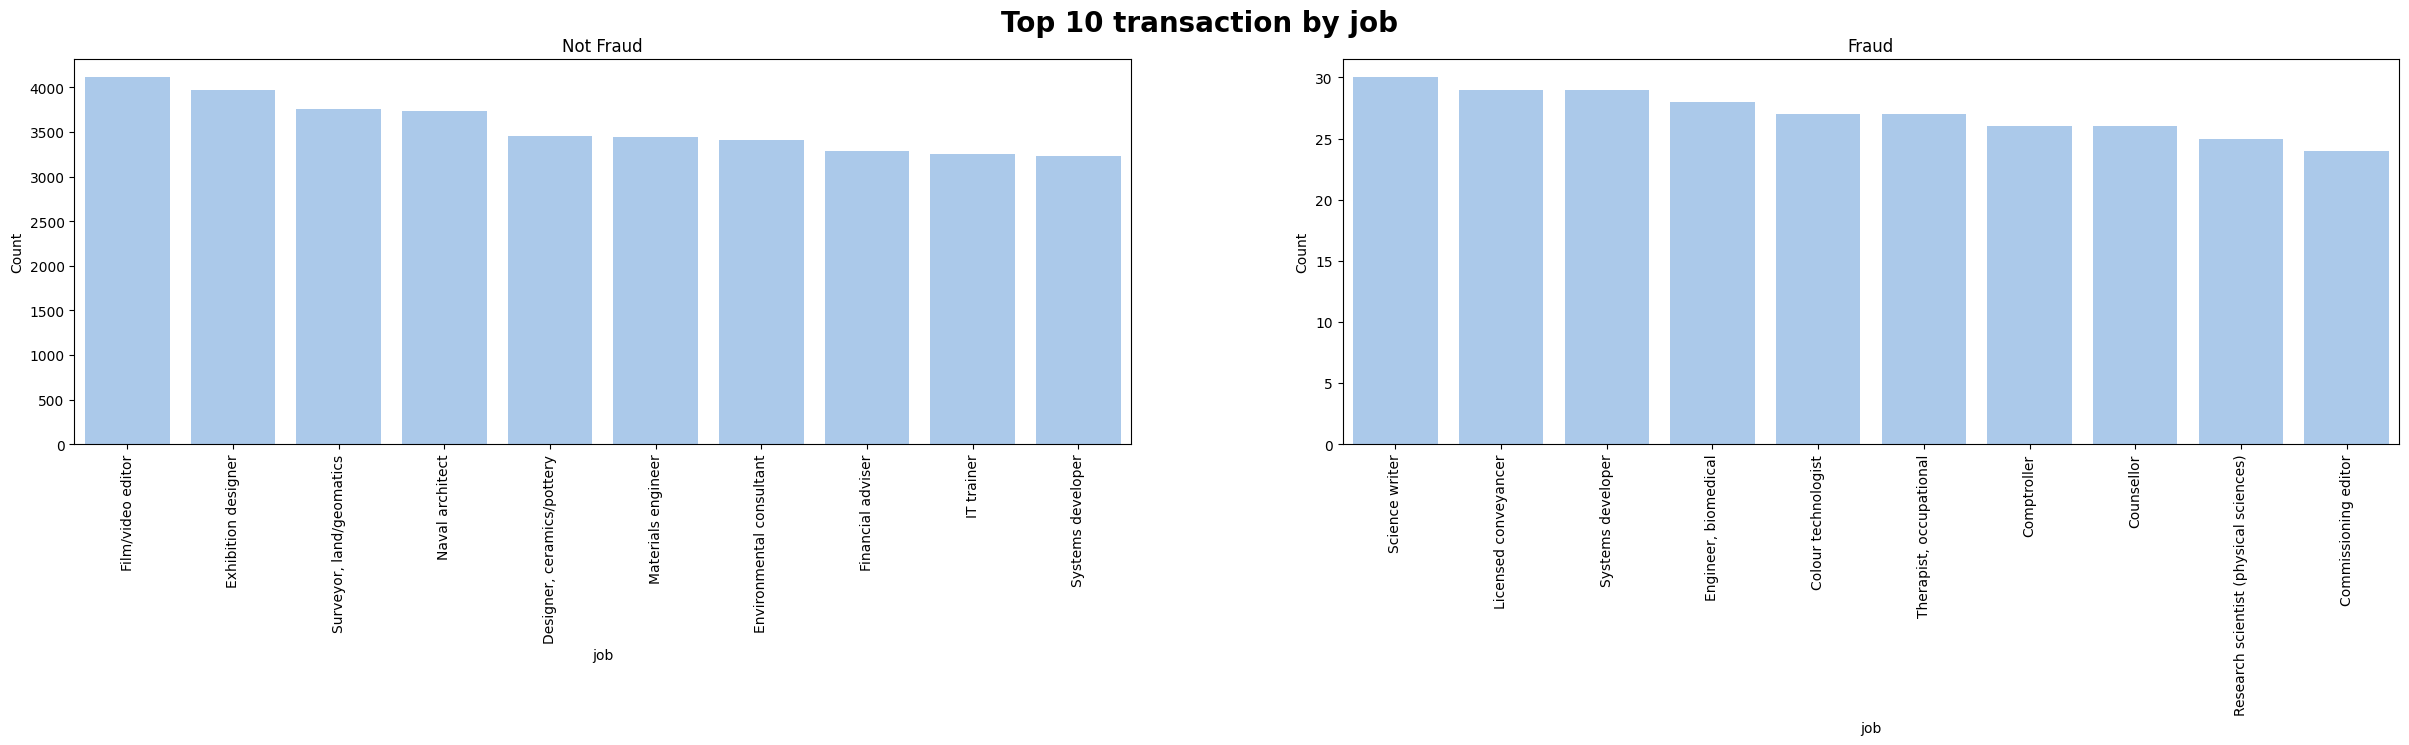

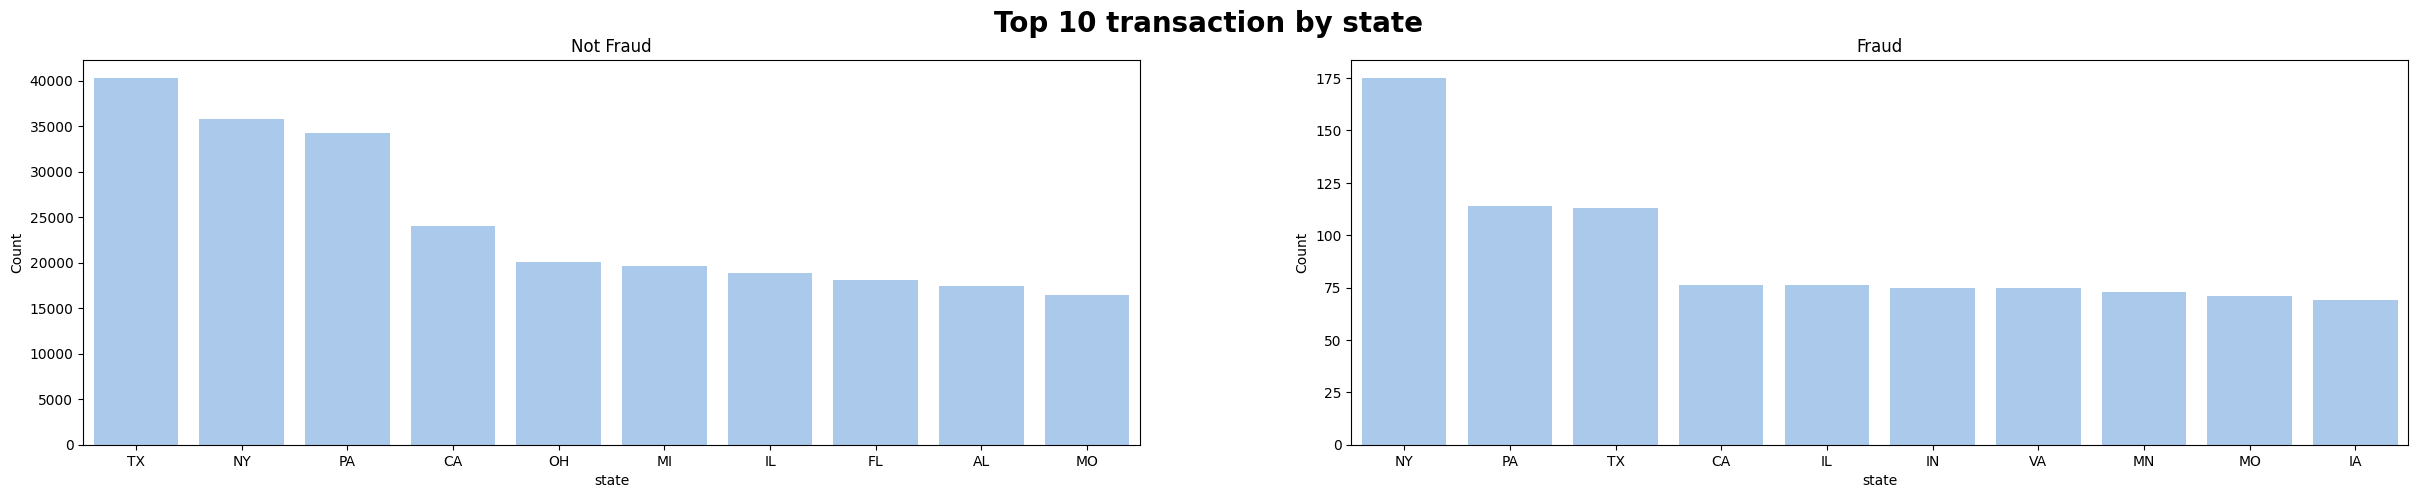

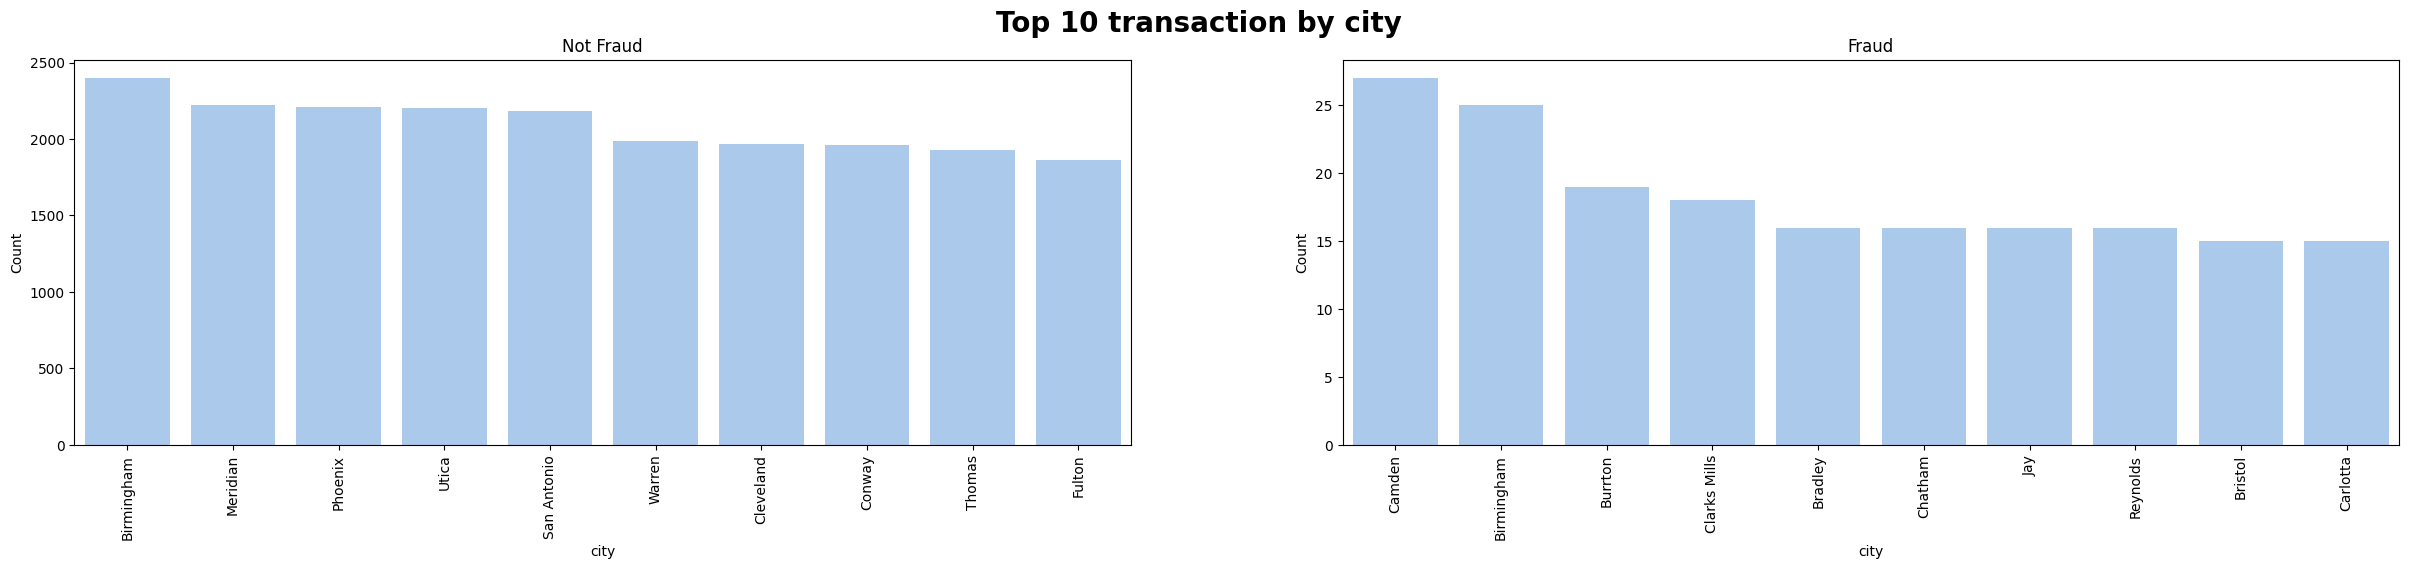

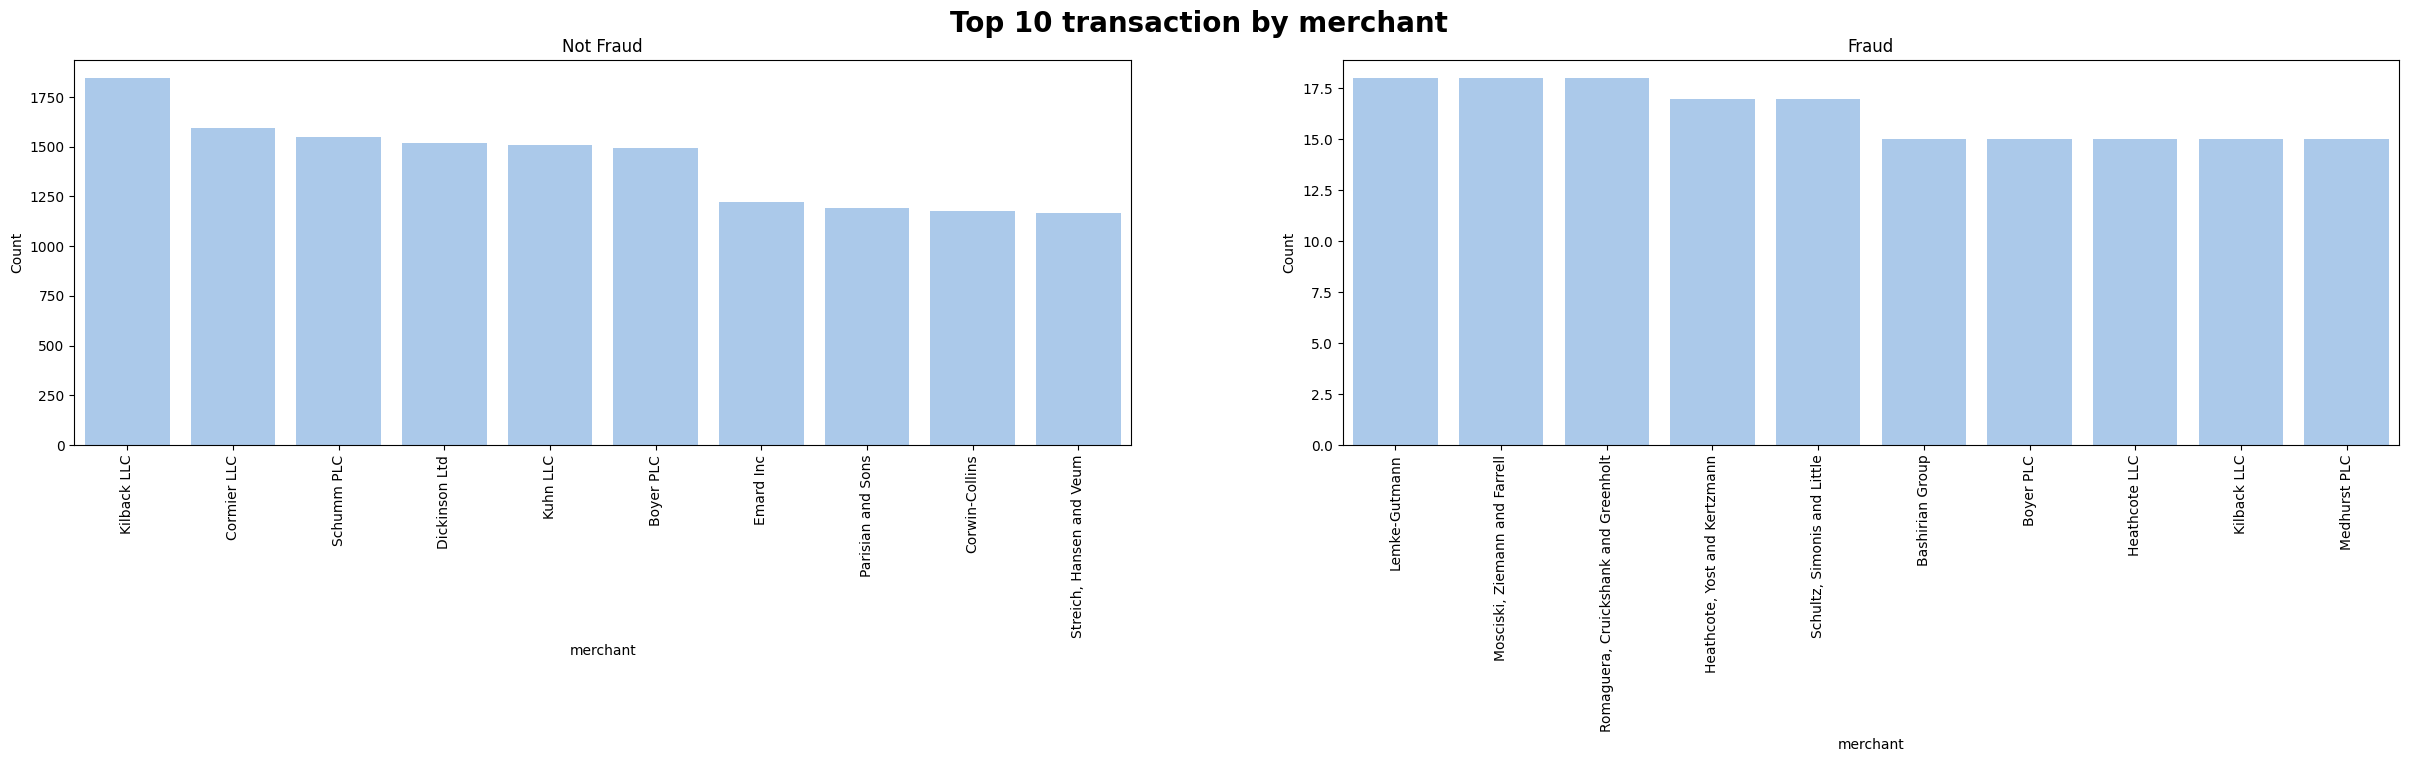

In [29]:
#By Transaction count
columns = ['job','state','city','merchant']
columns_name = ['job','state','city','merchant']
fraud = ['Not Fraud','Fraud']
y = 0 
for col in columns:
    sns.set_palette("pastel")
    name = columns_name[y]
    y += 1
    fig = plt.figure(figsize=(30, 5))
    if (col == 'trans_dayOfWeek'):
        plt.suptitle("Top transaction by " + name, fontsize=20,fontweight="bold")
    else:
        plt.suptitle("Top 10 transaction by " + name, fontsize=20,fontweight="bold")   
    for i in range(0,len(fraud)):
        temp_df = df[df['is_fraud'] == i]
        top = temp_df.groupby(col).size().nlargest(10)
        plt.subplot(1,2,1+i)
        ax = sns.barplot(data = top.reset_index(), x = col, y=0, color='#a1c9f4')
        if (col == 'state'):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        plt.ylabel('Count')
        plt.xlabel(name)
        #plt.axhline(temp_df.groupby(col).size().mean(), color='red', linestyle='--')
        plt.title(fraud[i])
    plt.show()

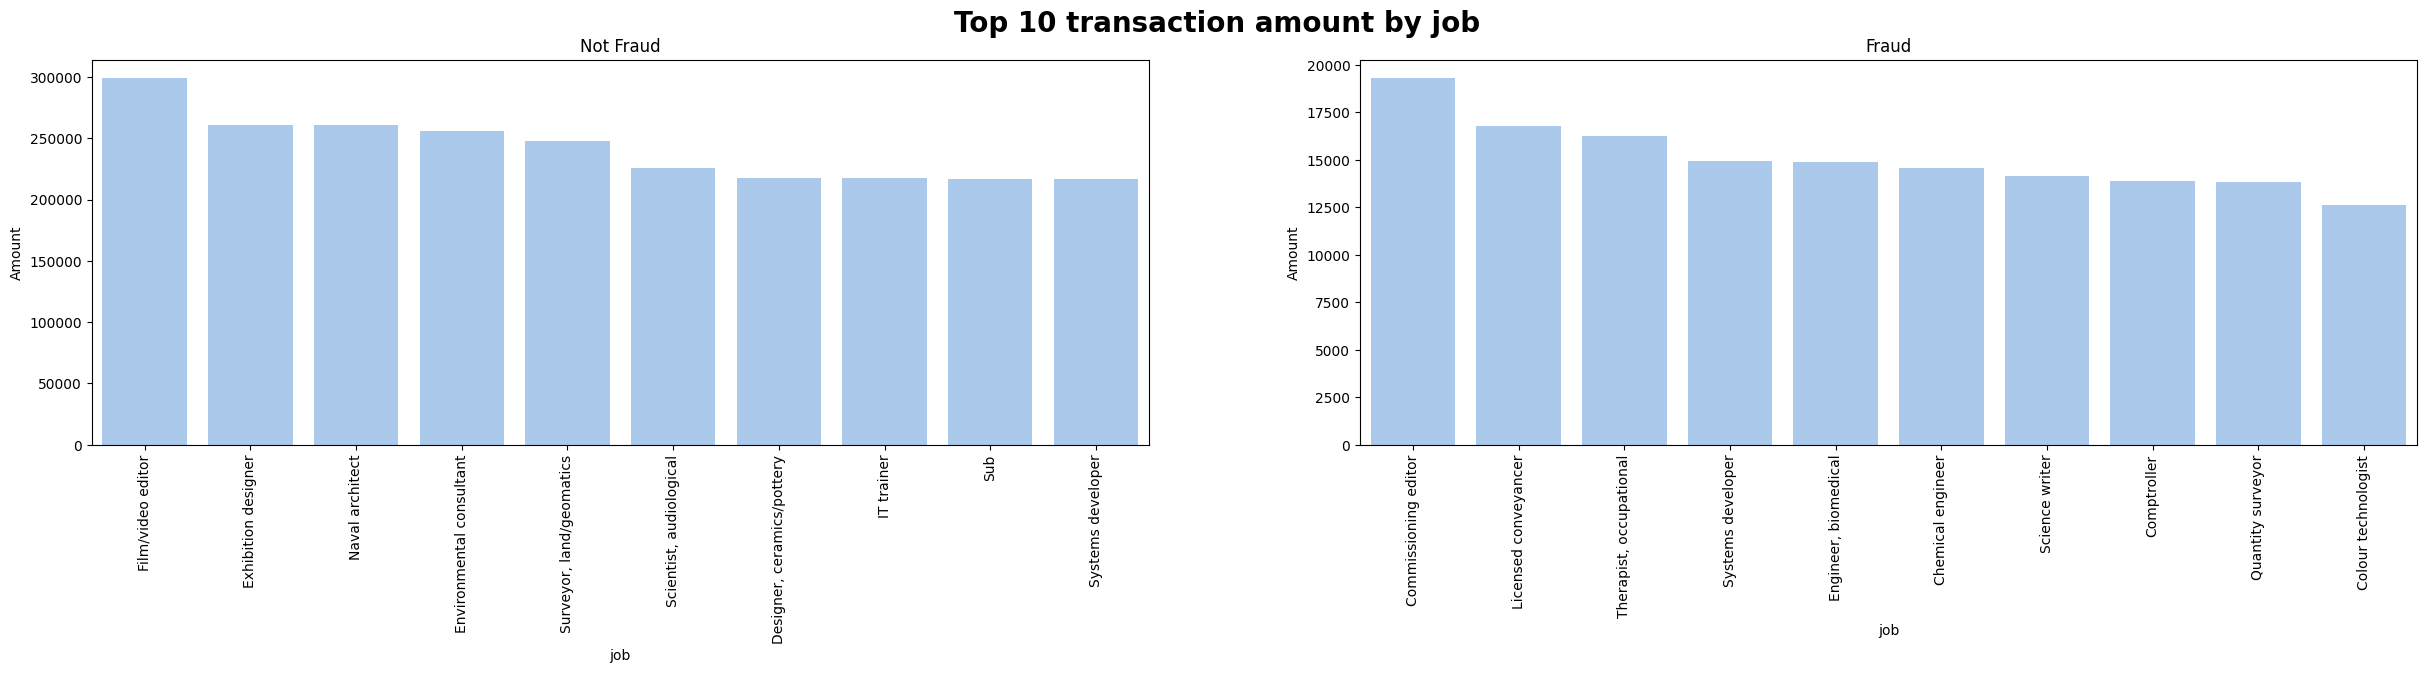

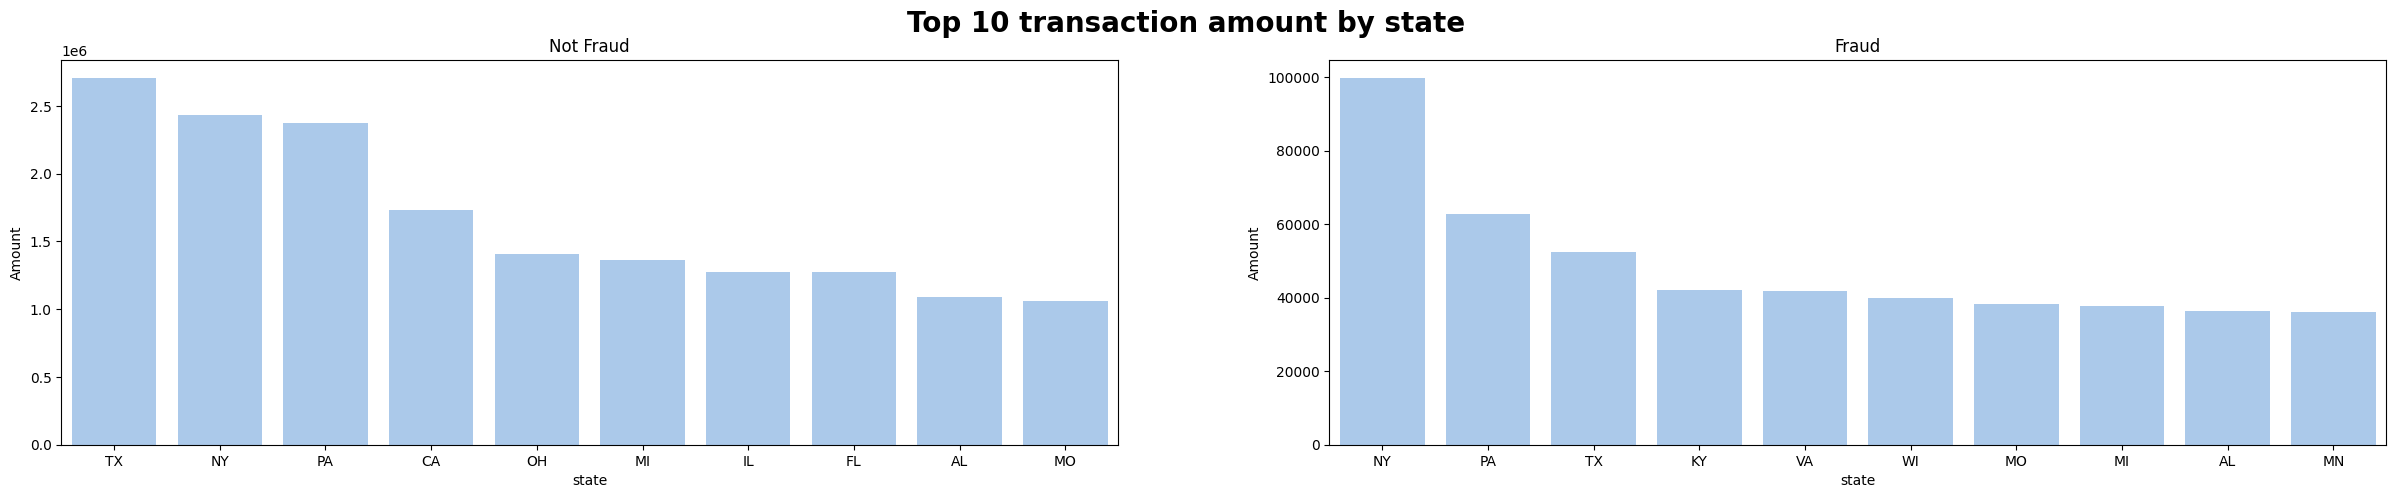

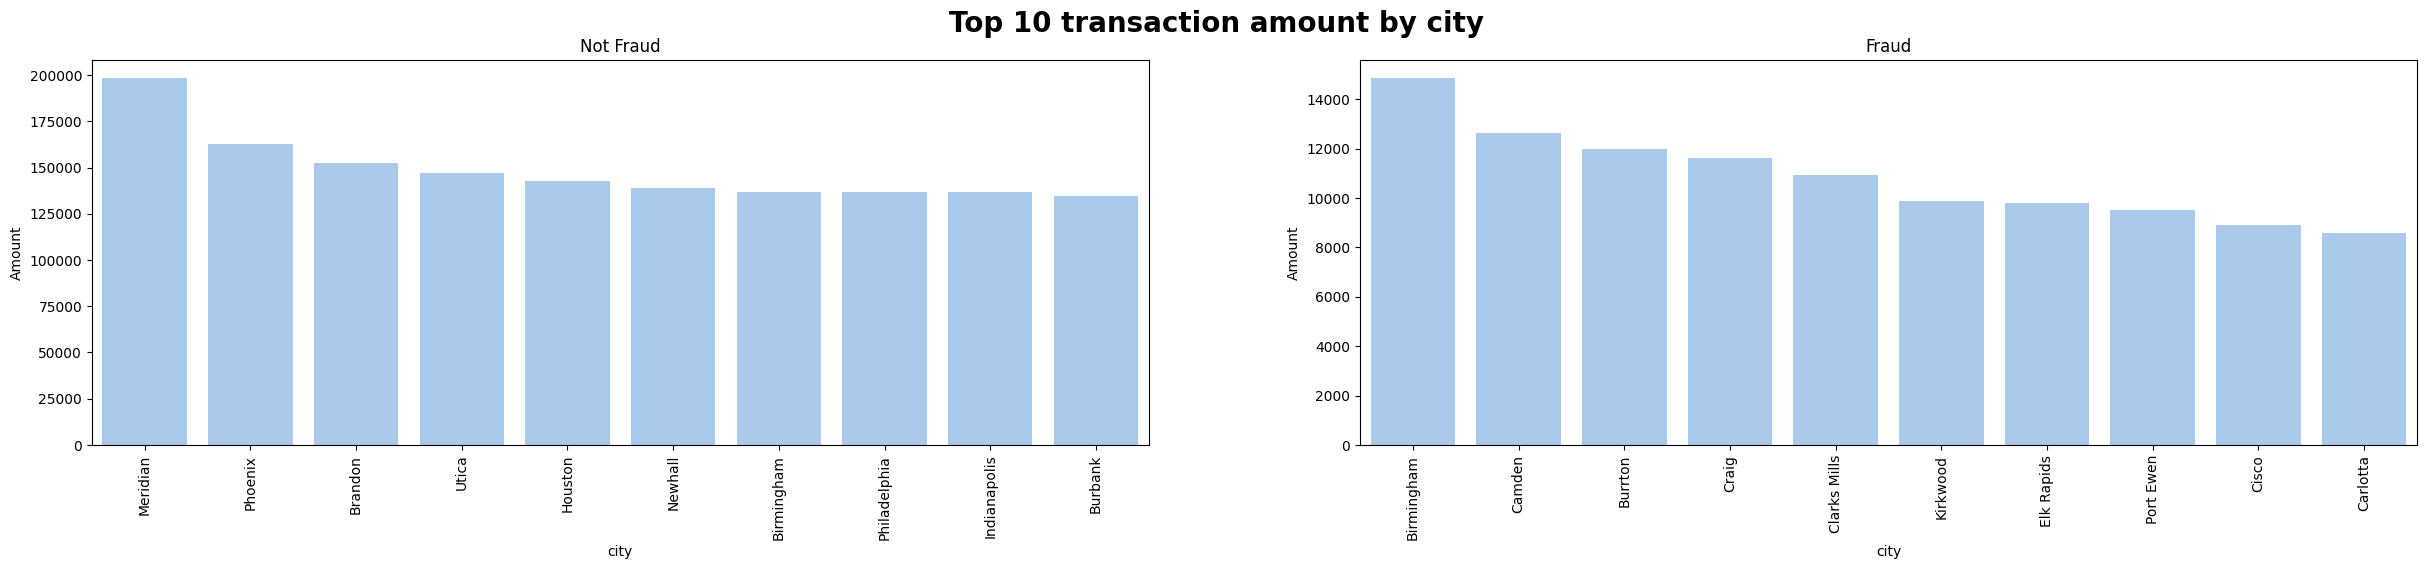

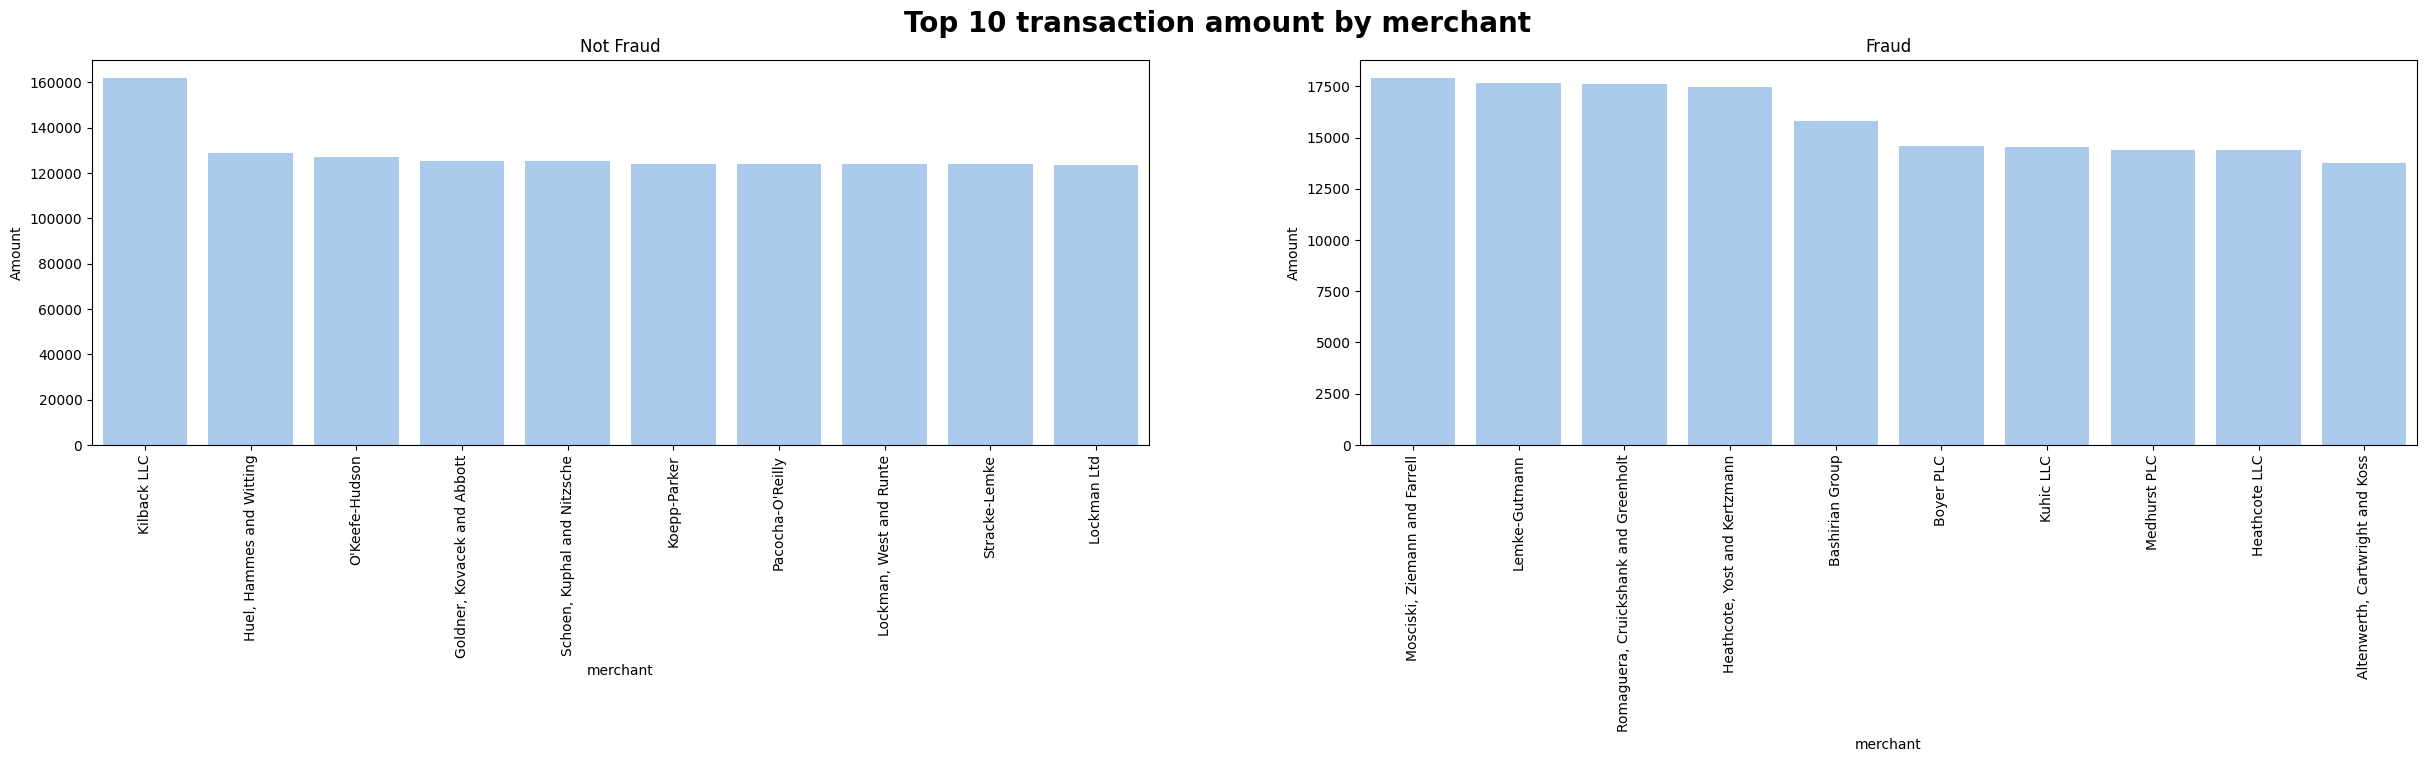

In [30]:
#TOP Transaction Amount
columns = ['job','state','city','merchant']
columns_name = ['job','state','city','merchant']
fraud = ['Not Fraud','Fraud']
y = 0 
for col in columns:
    name = columns_name[y]
    y += 1
    fig = plt.figure(figsize=(30, 5))
    plt.suptitle("Top 10 transaction amount by " + name, fontsize=20,fontweight="bold")
    
    for i in range(0,len(fraud)):
        temp_df = df[df['is_fraud'] == i]
        top = temp_df.groupby(col)['amt'].sum().nlargest(10)
        plt.subplot(1,2,1+i)
        ax = sns.barplot(data = top.reset_index(), x = col, y='amt', color='#a1c9f4')
        if (col == 'state'):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        plt.ylabel('Amount')
        plt.xlabel(name)
        plt.title(fraud[i])
    plt.show()

When observing 'Top 10 transaction' and 'Top 10 transaction amount' charts, we can see that that share similar pattern. High number of transaction also have high number of amount

**Analysis on potential suspicious transaction**

In [31]:
df[df['age'] >= 80]['is_fraud'].value_counts()

is_fraud
0    30273
1      113
Name: count, dtype: int64

In [32]:
df_over80 = df[(df['age'] >= 80) & (df['is_fraud'] == 0)].sort_values(by="trans_time", ascending=False)
df_over80

,id,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,is_fraud,trans_date,trans_time,trans_time_group,trans_month,trans_dayOfWeek,age,age_group,is_not_fraud,fraud
549313,549313,2020-12-29 23:59:00,3.549200e+15,Heller PLC,health_fitness,131.07,M,Scarborough,ME,Make,0,2020-12-29,23:59:00,23,2020-12,Tuesday,87,Elder,1,Not Fraud
161201,161201,2020-08-16 23:59:00,3.008200e+13,Leannon-Ward,food_dining,23.44,F,Naples,FL,"Pilot, airline",0,2020-08-16,23:59:00,23,2020-08,Sunday,86,Elder,1,Not Fraud
105871,105871,2020-07-27 23:59:00,4.171400e+15,"Hyatt, Russel and Gleichner",health_fitness,65.59,F,Marietta,SC,Museum/gallery exhibitions officer,0,2020-07-27,23:59:00,23,2020-07,Monday,86,Elder,1,Not Fraud
473429,473429,2020-12-13 23:59:00,4.509140e+15,"Wuckert, Wintheiser and Friesen",home,4.29,F,Surrency,GA,"Engineer, technical sales",0,2020-12-13,23:59:00,23,2020-12,Sunday,94,Elder,1,Not Fraud
473434,473434,2020-12-13 23:59:00,4.502540e+18,Altenwerth-Kilback,home,5.03,F,Ash Flat,AR,Hydrologist,0,2020-12-13,23:59:00,23,2020-12,Sunday,94,Elder,1,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479838,479838,2020-12-15 00:00:00,4.018110e+18,"Goyette, Howell and Collier",shopping_pos,2.89,F,Allenhurst,NJ,"Administrator, charities/voluntary organisations",0,2020-12-15,00:00:00,0,2020-12,Tuesday,85,Elder,1,Not Fraud
170872,170872,2020-08-20 00:00:00,4.066600e+12,Kutch and Sons,grocery_pos,141.37,F,River,KY,Quarry manager,0,2020-08-20,00:00:00,0,2020-08,Thursday,89,Elder,1,Not Fraud
338150,338150,2020-10-29 00:00:00,4.988300e+12,Volkman Ltd,misc_net,101.76,M,Rock Tavern,NY,Building surveyor,0,2020-10-29,00:00:00,0,2020-10,Thursday,83,Elder,1,Not Fraud
192656,192656,2020-08-28 00:00:00,3.560250e+15,"Daugherty, Pouros and Beahan",shopping_pos,5.28,F,Wichita,KS,Textile designer,0,2020-08-28,00:00:00,0,2020-08,Friday,90,Elder,1,Not Fraud


In [33]:
df_over80['category'].value_counts()

category
gas_transport     3586
kids_pets         3002
home              2900
grocery_pos       2884
shopping_pos      2439
personal_care     2388
entertainment     2211
food_dining       2131
shopping_net      2024
health_fitness    1970
misc_pos          1625
misc_net          1481
travel            1215
grocery_net        417
Name: count, dtype: int64

In [34]:
df_over80_category = df_over80.pivot_table(index="trans_time_group",columns="category",aggfunc='count').fillna(0)

In [35]:
df_over80['trans_time_group'].value_counts()

trans_time_group
0     1411
11    1410
7     1407
2     1395
8     1384
1     1375
6     1373
4     1360
10    1353
3     1352
5     1341
9     1270
22    1210
19    1205
23    1194
16    1182
17    1153
12    1150
21    1148
14    1147
13    1128
20    1122
15    1111
18    1092
Name: count, dtype: int64

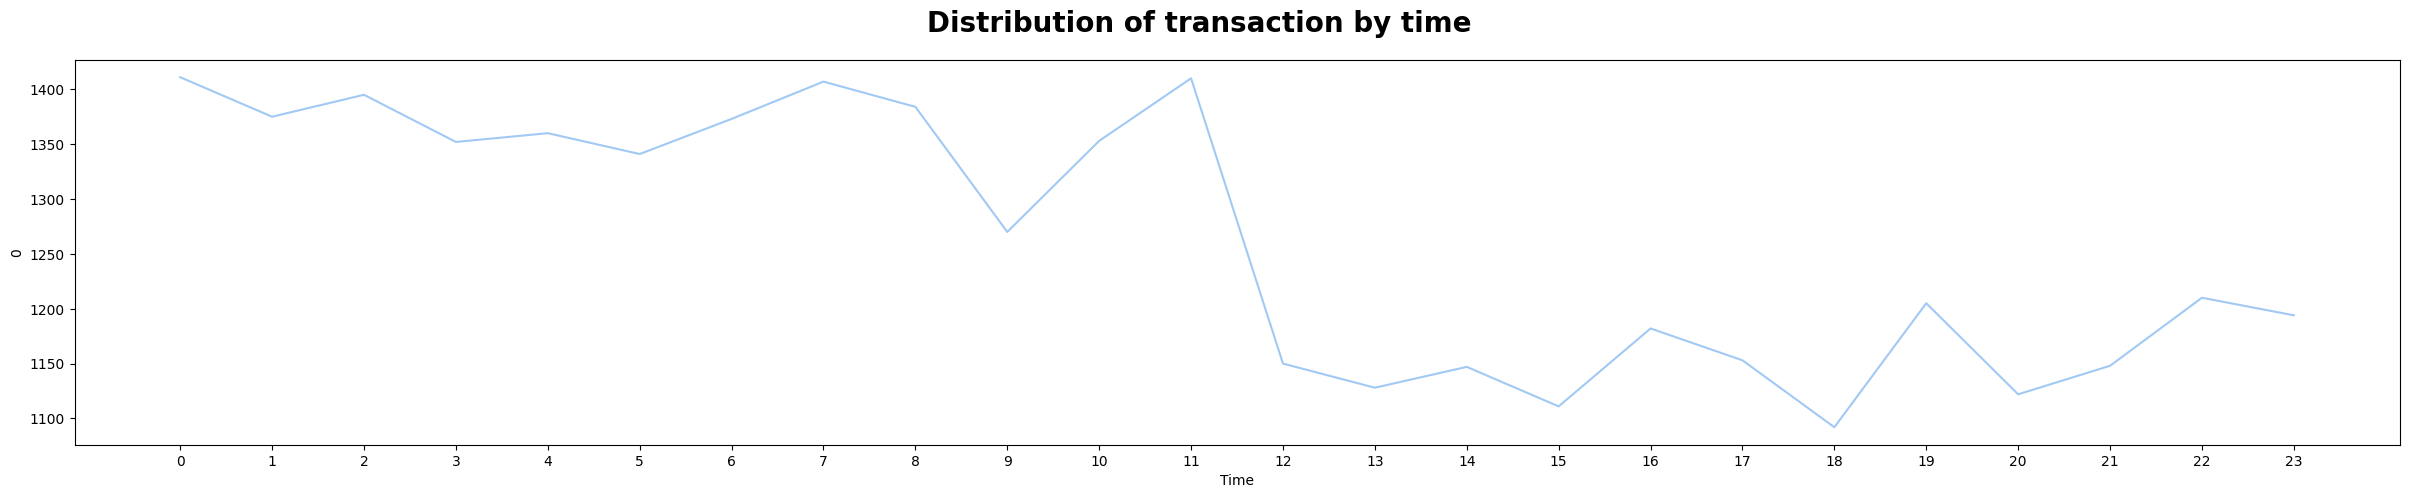

In [36]:
fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by time",fontsize=20,fontweight='bold')
temp = df_over80.groupby('trans_time_group').size().reset_index().sort_values(by='trans_time_group')
ax = sns.lineplot(data=temp, x="trans_time_group", y=0)
ax.set(xticks=temp['trans_time_group'].unique())
plt.xlabel('Time')
plt.show()

It's quite unusual for elder >80 to make transaction at around 0-2h or 22-23h. We should consider taking a deeper look a these.

# **Correlation**

In [37]:
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

df.drop(columns=['trans_date','trans_time','age_group','fraud'],inplace=True)
df_train = df.copy()

le = LabelEncoder()
for columns in df.columns:
    if df_train[columns].dtype == 'object':
        df_train[columns] = le.fit_transform(df_train[columns])

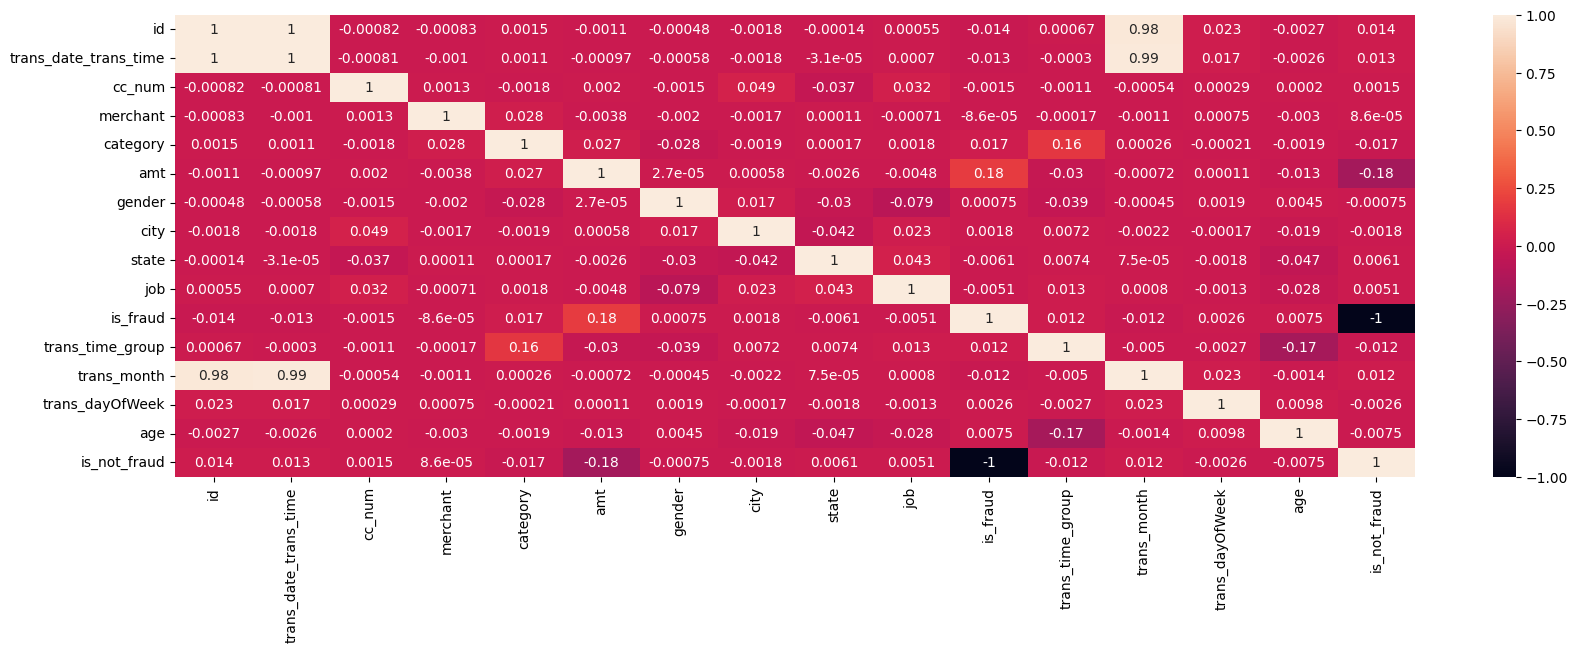

In [38]:
plt.figure(figsize=(20,6))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

# Training model

In [39]:
#Select X an y
model_features = ["gender","job",'category',"merchant", "state","age"]
target = ["is_fraud"]

X = df_train[model_features]
y = df_train[target]

#Build model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# As the dataset is consist of huge number for non fraud cases compare to the fraud cases
# Balance the dataset using SMOTE
smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train = X_train_resampled
y_train = y_train_resampled

#standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [40]:
# Model training
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
rfc = RandomForestClassifier()


lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [41]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

y_train_pred_rfc = rfc.predict(X_train)
y_test_pred_rfc = rfc.predict(X_test)

In [42]:
accuracy_logistic = accuracy_score(y_test, y_test_pred_lr)
print("Accuracy of Logistic Regression:", accuracy_logistic)

accuracy_logistic = accuracy_score(y_test, y_test_pred_dt)
print("Accuracy of DecisionTreeClassifier:", accuracy_logistic)

accuracy_logistic = accuracy_score(y_test, y_test_pred_knn)
print("Accuracy of KNeighborsClassifier:", accuracy_logistic)

accuracy_logistic = accuracy_score(y_test, y_test_pred_rfc)
print("Accuracy of RandomForestClassifier:", accuracy_logistic)

Accuracy of Logistic Regression: 0.9931080400201541
Accuracy of DecisionTreeClassifier: 0.995981189567888
Accuracy of KNeighborsClassifier: 0.9944756352119772
Accuracy of RandomForestClassifier: 0.9961611363036541


In [43]:
# performance on train set
print("Logistic Regression")
print(classification_report(y_train, y_train_pred_lr))  

print("DecisionTreeClassifier")
print(classification_report(y_train, y_train_pred_dt))  

print("KNeighborsClassifier")
print(classification_report(y_train, y_train_pred_knn))

print("RandomForestClassifier")
print(classification_report(y_train, y_train_pred_rfc))  

Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.52      0.59    387498
           1       0.61      0.74      0.67    387498

    accuracy                           0.63    774996
   macro avg       0.64      0.63      0.63    774996
weighted avg       0.64      0.63      0.63    774996

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387498
           1       1.00      1.00      1.00    387498

    accuracy                           1.00    774996
   macro avg       1.00      1.00      1.00    774996
weighted avg       1.00      1.00      1.00    774996

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    387498
           1       0.98      1.00      0.99    387498

    accuracy                           0.99    774996
   macro avg       0.99      0.99      0.99    774996
weighted a

<function matplotlib.pyplot.show(close=None, block=None)>

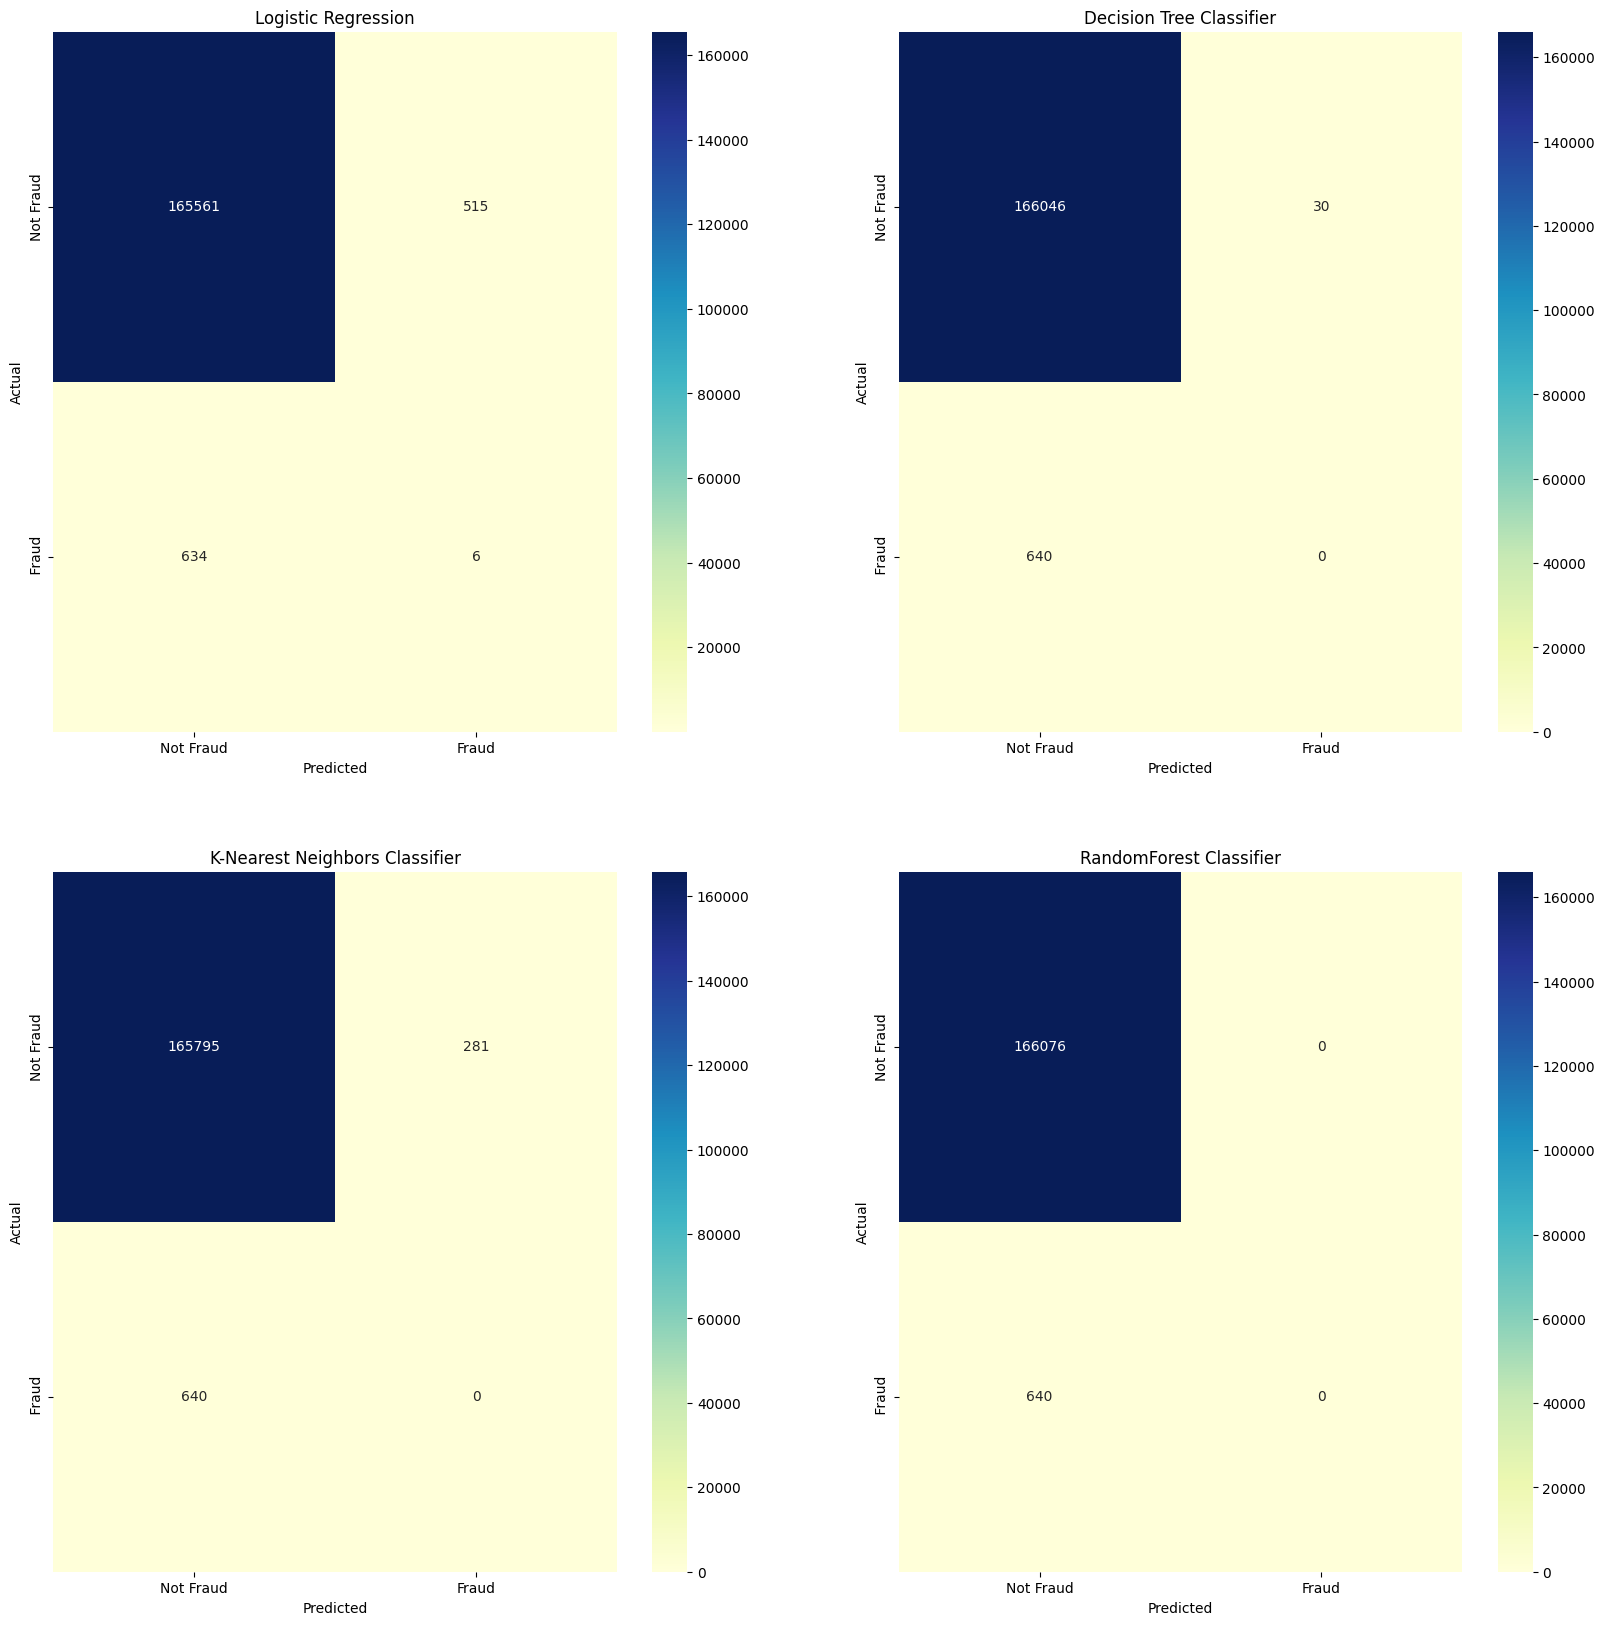

In [44]:
fig, axes = plt.subplots(2,2, figsize=(20,20))

data = confusion_matrix(y_test, y_test_pred_lr)
df_cm = pd.DataFrame(
    data,
    columns=["Not Fraud", "Fraud"],
    index=["Not Fraud", " Fraud"],
)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
ax1 = sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="g",ax=axes[0,0]);
ax1.title.set_text("Logistic Regression")

data = confusion_matrix(y_test, y_test_pred_dt)
df_cm = pd.DataFrame(
    data,
    columns=["Not Fraud", "Fraud"],
    index=["Not Fraud", " Fraud"],
)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
ax2 = sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="g",ax=axes[0,1]);
ax2.title.set_text("Decision Tree Classifier")


data = confusion_matrix(y_test, y_test_pred_knn)
df_cm = pd.DataFrame(
    data,
    columns=["Not Fraud", "Fraud"],
    index=["Not Fraud", " Fraud"],
)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
ax3 = sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="g",ax=axes[1,0]);
ax3.title.set_text("K-Nearest Neighbors Classifier")


data = confusion_matrix(y_test, y_test_pred_rfc)
df_cm = pd.DataFrame(
    data,
    columns=["Not Fraud", "Fraud"],
    index=["Not Fraud", " Fraud"],
)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
ax4= sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="g",ax=axes[1,1]);
ax4.title.set_text("RandomForest Classifier")

plt.show